In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [4]:
df_torii = pd.read_csv('data/IoT-23_Torii.csv')
df_cc = pd.read_csv('data/IoT-23_C&C.csv')
df_normal = pd.read_csv('data/IoT-23_Normal.csv')

In [21]:
df_torii["label"] = 1
df_cc["label"] = 1
df_normal["label"] = 0

In [22]:
df_anon = pd.concat([df_torii, df_cc], ignore_index=True)
rows = df_anon.shape[0]

In [23]:
df_normal = df_normal.sample(n=rows)
print(f"Number of rows in df_anon: {df_anon.shape[0]}")
print(f"Number of rows in df_normal: {df_normal.shape[0]}")

Number of rows in df_anon: 57839
Number of rows in df_normal: 57839


In [24]:
df_all = pd.concat([df_anon, df_normal], ignore_index=True)

In [28]:
df_all.drop(columns=["Flow_ID", "Src_IP", "Dst_IP", "Src_Port", "Dst_Port", "Timestamp"], inplace=True, errors='ignore')
df_all.fillna(0, inplace=True)

label
1    57839
0    57839
Name: count, dtype: int64


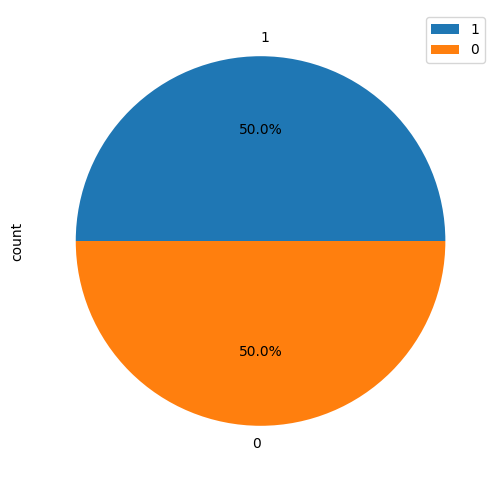

In [29]:
df_all['label'].value_counts().plot(kind = 'pie', autopct='%1.1f%%', figsize=(6, 6)).legend(bbox_to_anchor=(1, 1))
print(df_all['label'].value_counts())

In [38]:
y = df_all['label']
X = df_all.drop(columns=['label', 'Sub_Cat'])  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [40]:
clf = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [43]:
y_pred = clf.predict(X_test)
y_probs = clf.predict_proba(X_test)[:, 1]

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_probs))

[[11525    43]
 [   42 11526]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11568
           1       1.00      1.00      1.00     11568

    accuracy                           1.00     23136
   macro avg       1.00      1.00      1.00     23136
weighted avg       1.00      1.00      1.00     23136

ROC AUC Score: 0.9996543194167054
